<a href="https://colab.research.google.com/github/Jenicisprakash/machine-learning/blob/main/hand_wrt_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
#def function
def showimage(dframe, index):
  some_digit = dframe.to_numpy()[index]
  some_digit_image = some_digit.reshape(28,28)

  plt.imshow(some_digit_image, cmap= "binary")
  plt.axis("off")
  plt.show()

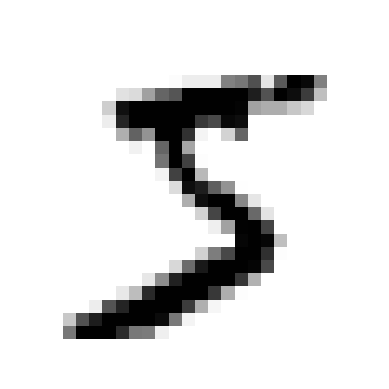

In [ ]:
#sample use:
showimage(mnist.data, 0)

In [ ]:
#train and test data
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size = 1/7.0, random_state= 0 )

In [ ]:
type(train_img)

pandas.core.frame.DataFrame

In [ ]:
test_img_copy = test_img.copy()

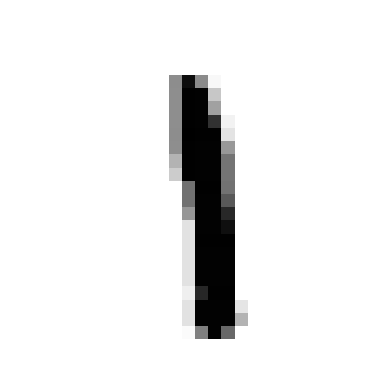

In [ ]:
showimage(test_img_copy, 2)

In [ ]:
scaler = StandardScaler()

scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
pca_model = PCA(.95)

pca_model.fit(train_img)

PCA(n_components=0.95)

In [ ]:
print(pca_model.n_components_)

327


In [ ]:
train_img = pca_model.transform(train_img)
test_img = pca_model.transform(test_img)

In [ ]:
lr = LogisticRegression(solver= 'lbfgs' , max_iter = 10000)

In [ ]:
lr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

In [ ]:
lr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

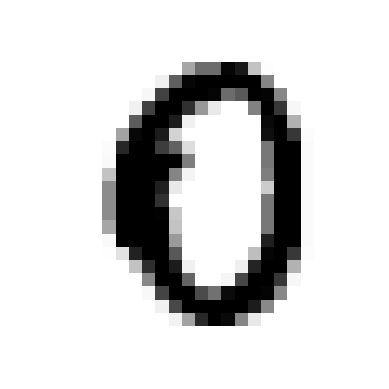

In [ ]:
showimage(test_img_copy, 0)

In [ ]:
lr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

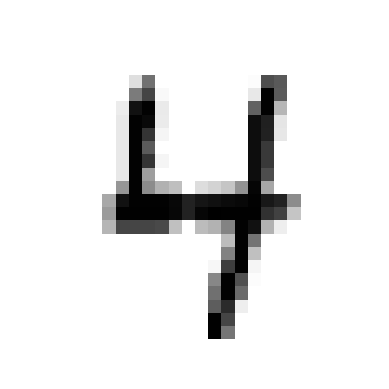

In [ ]:
showimage(test_img_copy, 1)


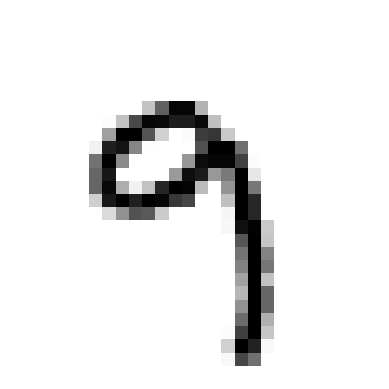

In [ ]:
showimage(test_img_copy, 42)

In [ ]:
lr.predict(test_img[42].reshape(1,-1))

array(['9'], dtype=object)

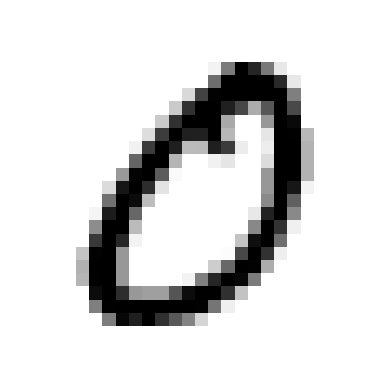

In [ ]:
showimage(test_img_copy, 57)

In [ ]:
lr.predict(test_img[57].reshape(1,-1))

array(['0'], dtype=object)

In [ ]:
lr.score(test_img, test_lbl)

0.9184